In [1]:
# Prepare envs
##  Libs
import sys
proj_path_str='..'
sys.path.append(proj_path_str)
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

## set up Fonts for vis
import matplotlib.pyplot as plt
plt.rcParams['font.serif'] = 'Times New Roman' #Times New Roman
plt.rcParams['font.family'] = 'DeJavu Serif' #DeJavu Serif 	 [ 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ]
#matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

## Prepare folders and files
data_dir = Path(proj_path_str) / 'data'
fig_dir = Path(proj_path_str) / 'figs'
data_tab_file  = data_dir / 'causal_literature_darta.csv'

# data preproc
## read data
data_df = pd.read_csv(data_tab_file, sep=',', header=0, index_col=None)
data_df = data_df.iloc[1:, [0,1,2,4,5,6]].copy()
data_df.sort_values(by='Year', ignore_index=True, inplace=True)
data_df.iloc[:, 1:] = data_df.iloc[:, 1:].cumsum(axis=0).apply(lambda x:np.log10(x)) # calculate cdf in log scale

col_labels = data_df.columns
col_labels

Index(['Year', 'Causal', 'Clinical', 'Neurology', 'Psychiatry',
       'Neuroimaging'],
      dtype='object')

saving...


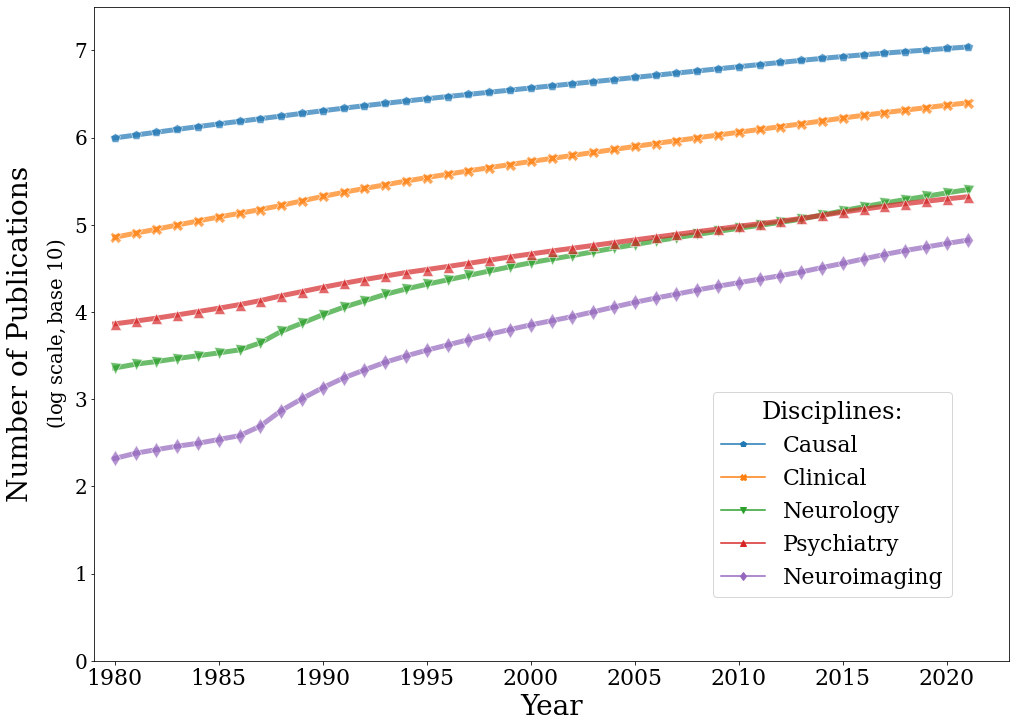

In [2]:
# Making figures
save_fig = 1
figure_size=(14, 10)

X_LIM=[1979, 2023]
Y_LIM=[0, 7.5]
TICK_FONT_SIZE=20
LABEL_FONT_SIZE=28
#X_TICKS=[1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2022]
#X_TICK_LABELS=['before 1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020', '2022']

vis_df=pd.melt(data_df, id_vars = ['Year'], 
               var_name = 'Research Fields', 
               value_vars = col_labels[1:], 
               value_name = 'Number of Publications',
               )

vis_cols = vis_df.columns

f1, ax_lineplot = plt.subplots(figsize=figure_size, facecolor='w', edgecolor='lightgray', constrained_layout=True,) 
ax_lineplot = sns.lineplot(data=vis_df, x=vis_cols[0], y=vis_cols[2], hue=vis_cols[1], style=vis_cols[1],
                           legend='auto', linewidth=5, dashes=False, markers=['p', 'X', 'v', '^', 'd'], markersize=11, alpha=0.7)

plt.xlabel(vis_cols[0], fontsize=LABEL_FONT_SIZE)
plt.ylabel(u'Number of Publications\n$\\regular_{(log\ scale, base\ 10)}$', fontsize=LABEL_FONT_SIZE)
plt.xlim(X_LIM)
plt.ylim(Y_LIM)
for label in ax_lineplot.get_xticklabels():
    label.set_fontsize(TICK_FONT_SIZE+2)
for label in ax_lineplot.get_yticklabels():
    label.set_fontsize(TICK_FONT_SIZE)
plt.legend(loc=4, bbox_to_anchor=(0.95, 0.08), fancybox=True, fontsize=22, title='Disciplines:', title_fontsize=24, )

if save_fig: 
    print('saving...'); 
    f1.savefig(( fig_dir / 'Fig1-causal_trend.jpg'), 
    dpi=330, bbox_inches='tight', pad_inches=0.1);

In [3]:
data_df

Year    Causal  Clinical  Neurology  Psychiatry  Neuroimaging
0   1980  5.996009  4.856215   3.358125    3.864214      2.320146
1   1981  6.029072  4.904153   3.401228    3.895312      2.380211
2   1982  6.061772  4.949317   3.431685    3.929215      2.421604
3   1983  6.094093  4.997229   3.466571    3.966376      2.460898
4   1984  6.125844  5.043551   3.498448    4.004493      2.494155
5   1985  6.156979  5.089184   3.531223    4.043166      2.537819
6   1986  6.186889  5.131513   3.565612    4.084719      2.582063
7   1987  6.216868  5.175152   3.646208    4.130527      2.691965
8   1988  6.247020  5.221972   3.777282    4.185542      2.869232
9   1989  6.277520  5.274714   3.872215    4.233732      3.005181
10  1990  6.307938  5.325298   3.968483    4.282758      3.131619
11  1991  6.337224  5.372266   4.054881    4.328604      3.243534
12  1992  6.365363  5.416441   4.127882    4.371400      3.335257
13  1993  6.392743  5.458704   4.202216    4.411855      3.423410
14  1994  6.419359  5.501276   4.263612    4.452277      3.495683
15  1995  6.445412  5.541592   4.318418    4.486275      3.562174
16  1996  6.470632  5.580059   4.368157    4.521203      3.622110
17  1997  6.495304  5.618021   4.419013    4.557254      3.682235
18  1998  6.520133  5.655111   4.469689    4.594183      3.744528
19  1999  6.544488  5.690869   4.518264    4.631139      3.799272
20  2000  6.569133  5.726377   4.564323    4.665468      3.852419
21  2001  6.593374  5.761061   4.606360    4.699231      3.899875
22  2002  6.616990  5.795034   4.647471    4.730798      3.947483
23  2003  6.641047  5.829695   4.690178    4.763128      4.001517
24  2004  6.665055  5.863886   4.732820    4.795226      4.056829
25  2005  6.689727  5.898629   4.773399    4.826684      4.110994
26  2006  6.714717  5.932098   4.814001    4.858447      4.159327
27  2007  6.739531  5.964956   4.851674    4.889879      4.204961
28  2008  6.764219  5.997462   4.889218    4.920817      4.251906
29  2009  6.788659  6.029444   4.925090    4.951095      4.296051
30  2010  6.813182  6.061437   4.959814    4.982863      4.336320
31  2011  6.837730  6.093704   4.994128    5.012462      4.376431
32  2012  6.861952  6.125636   5.027883    5.041574      4.416441
33  2013  6.885682  6.157840   5.065165    5.072606      4.459242
34  2014  6.908297  6.191169   5.112933    5.108623      4.509471
35  2015  6.929832  6.224158   5.160757    5.145053      4.557531
36  2016  6.949767  6.255664   5.206845    5.179193      4.608890
37  2017  6.968596  6.285895   5.249736    5.211630      4.659384
38  2018  6.986675  6.314875   5.289324    5.241878      4.705017
39  2019  7.004332  6.342933   5.326438    5.269597      4.745153
40  2020  7.022487  6.372189   5.365830    5.296788      4.786098
41  2021  7.039279  6.399101   5.403462    5.321768      4.823833